<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Clustering Practice

In this practice we'll use homemade beer recipe data.

There are around 70,000 homebrewed beers with 12 numeric columns describing the beers and brewing process.

Your task is to find similar beers!

There are existing labels for beer "style" which we can use as a guide to see what our clusters look like.

In [1]:
import pandas as pd

beers = pd.read_csv("../assets/data/beers.csv.gz")
print(beers.shape)

(73861, 18)


### 1: Look at the dataset and perform some EDA.

- read the [data dictionary](assets/data/beers_data_dictionary.txt)
- look at missing values
- which columns could you use for clustering? (if you know something about beer-brewing, even better!)

In [2]:
beers.isnull().sum()

BeerID               0
Name                 1
Style              596
Size(L)              0
OG                   0
FG                   0
ABV                  0
IBU                  0
Color                0
BoilSize             0
BoilTime             0
BoilGravity       2990
Efficiency           0
MashThickness    29864
SugarScale           0
BrewMethod           0
PitchRate        39252
PrimaryTemp      22662
dtype: int64

Some columns have a lot of NULLs, we won't remove them as we'll lose a lot of data, we just won't use them for clustering.

However, a small percentage have a missing "style", and for those we won't be able to see how we did so we'll remove them. Another interesting idea would be to fill the style value in for them based on the results of clustering!

In [3]:
beers = beers[beers["Style"].isnull() == False]

### 2: Plot a pairplot for 4-5 columns to get a feel for what the data looks like

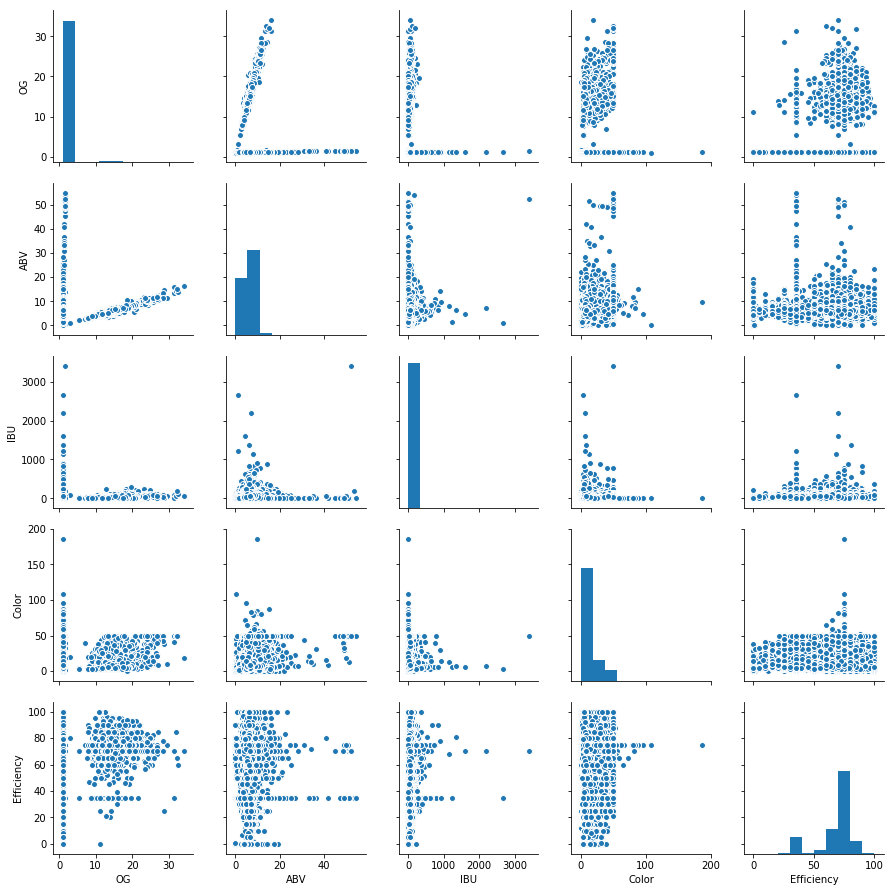

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

cols = ["OG", "ABV", "IBU", "Color", "Efficiency"]

sns.pairplot(beers, vars=cols);

In [5]:
beers[cols].describe()

,OG,ABV,IBU,Color,Efficiency
count,73265.000000,73265.000000,73265.000000,73265.000000,73265.000000
mean,1.406331,6.138439,44.380476,13.403860,66.335034
std,2.198052,1.874083,41.606932,11.935452,14.095789
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.051000,5.080000,23.490000,5.170000,65.000000
50%,1.058000,5.790000,35.870000,8.440000,70.000000
75%,1.069000,6.830000,56.490000,16.780000,75.000000
max,34.034500,54.720000,3409.300000,186.000000,100.000000


Looks like there are some zeroes, let's see how many

In [6]:
for c in cols:
    zeros = beers[beers[c] == 0]
    print(f"{c} has {len(zeros)} zeros")

OG has 0 zeros
ABV has 14 zeros
IBU has 3895 zeros
Color has 84 zeros
Efficiency has 100 zeros


Safe to drop

In [7]:
for c in cols: 
    beers = beers[beers[c] > 0]

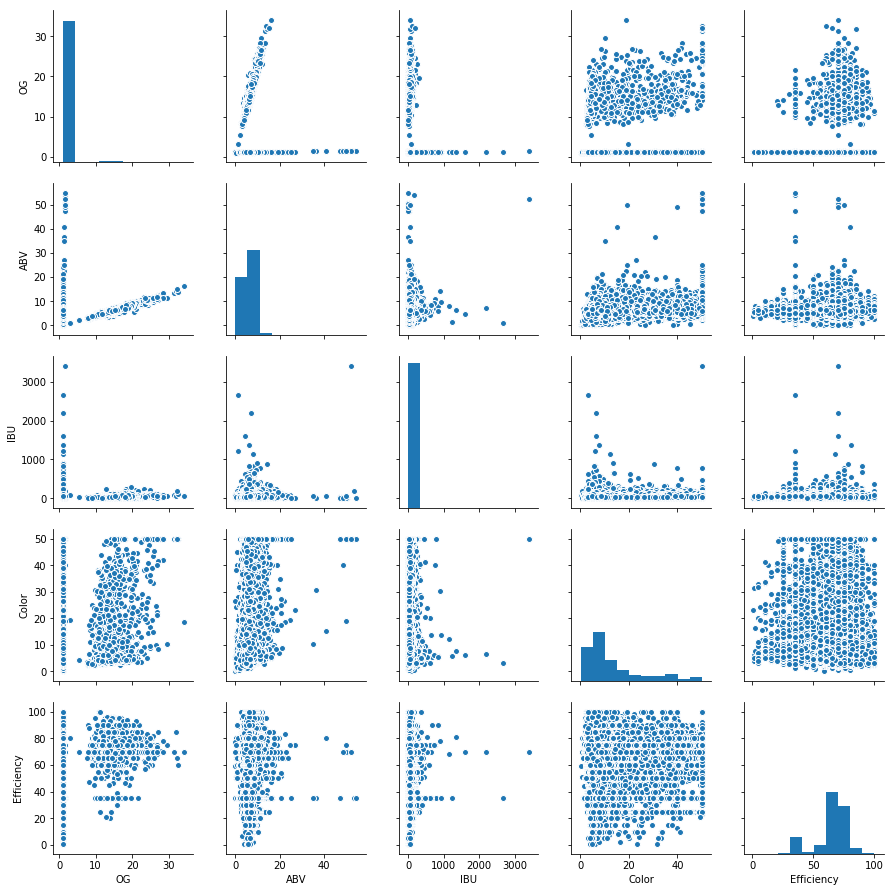

In [8]:
sns.pairplot(beers, vars=cols);

### 3: Look at how existing beer "styles" are distributed

In [9]:
beers["Style"].value_counts()

American IPA                         11546
American Pale Ale                     7361
Saison                                2516
American Amber Ale                    1961
Blonde Ale                            1700
American Light Lager                  1652
Imperial IPA                          1417
American Stout                        1224
Irish Red Ale                         1152
American Brown Ale                    1099
Witbier                               1030
Weissbier                              966
Oatmeal Stout                          915
California Common Beer                 890
Russian Imperial Stout                 887
Sweet Stout                            872
Weizen/Weissbier                       869
K�lsch                                 855
Robust Porter                          849
Double IPA                             837
Cream Ale                              800
American Porter                        767
English IPA                            760
Imperial St

There are 173 existing beer styles - probably too many!

### 4: Look at the distribution of your chosen variables. How close are they in scale?

In [10]:
beers[cols].describe()

,OG,ABV,IBU,Color,Efficiency
count,69298.000000,69298.000000,69298.000000,69298.000000,69298.000000
mean,1.409380,6.120302,46.882767,13.474716,66.455952
std,2.205036,1.698345,41.378751,11.883187,13.713081
min,1.000000,0.030000,0.040000,0.110000,0.800000
25%,1.051000,5.090000,25.400000,5.250000,65.000000
50%,1.058000,5.790000,37.350000,8.510000,70.000000
75%,1.068000,6.810000,58.260000,16.857500,75.000000
max,34.034500,54.720000,3409.300000,50.000000,100.000000


Not too far but "OG" has very small values and would be ignored as a dimension

### 5: Scale your variables in preparation for clustering

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_transformed = scaler.fit_transform(beers[cols])

### 6: Try k-means clustering by choosing a value of k (just a best guess for now!)

In [12]:
from sklearn.cluster import KMeans

# pretty arbitrary but let's try 10
kmeans = KMeans(n_clusters=10, random_state=42)
beers["cluster"] = kmeans.fit_predict(X_transformed)

### 7: Examine your results:

- what is the distribution (value counts) of your new labels?
- replot the pairplot coloured by your clusters - what do you think?

In [13]:
beers["cluster"].value_counts()

1    29479
9     9682
0     8072
5     7514
6     7366
3     2580
2     1792
4     1769
7     1037
8        7
Name: cluster, dtype: int64

One of those clusters only has 7 values... maybe 10 clusters is overkill, or there are 7 outlier beers

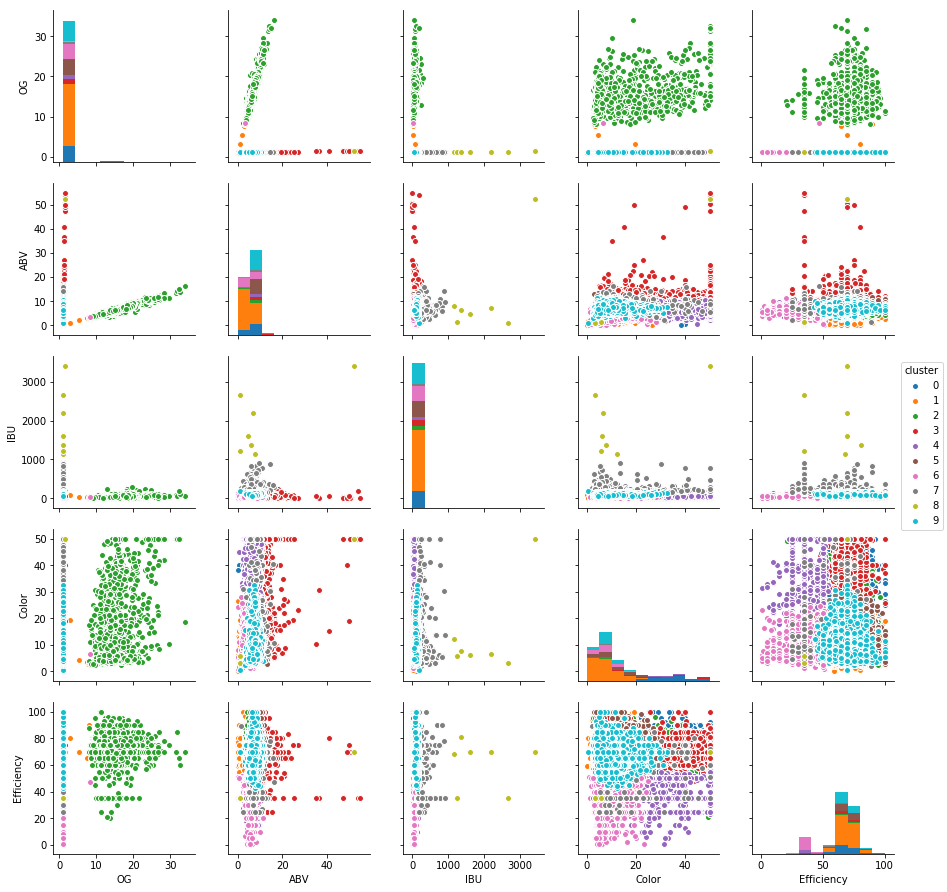

In [14]:
sns.pairplot(beers, vars=cols, hue="cluster");

### 8: (optional) choose some different columns if the plots look like there are oddities

Whatever "specific gravity of wort before fermentation" is, it's dominating our cluster assignments. Let's remove it.

In [15]:
cols.remove("OG")

In [16]:
# retransform
X_transformed = scaler.fit_transform(beers[cols])

### 9: Use "inertia" and the "elbow method" to find a "better" value for k

In [17]:
inertia_values = []

k_values = [3, 7, 10, 15, 25]

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_transformed)
    inertia_values.append(kmeans.inertia_)

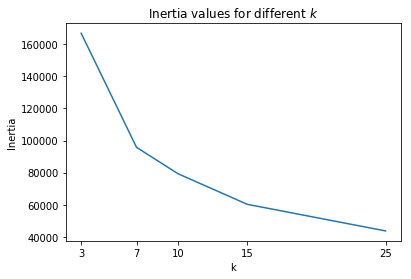

In [18]:
fig, ax = plt.subplots()

ax.plot(k_values, inertia_values)
ax.set_title("Inertia values for different $k$")
ax.set_xlabel("k")
ax.set_ylabel("Inertia")
ax.set_xticks(k_values)

plt.show()

Maybe there's an inflection point at 7? Let's go with 7.

### 10: choose an "optimal" value of $k$ that's not too large (less than 10-15). Refit your clusters if you didn't save the cluster assignments from step 9 (i.e. store which of your data points are assigned to which of your k clusters).

In [19]:
kmeans = KMeans(n_clusters=7, random_state=42)
beers["cluster_new"] = kmeans.fit_predict(X_transformed)

### 11: Examine your clusters

- what is the distribution of the new cluster label?
- what are the top styles in each of your clusters? do they make any sense?

In [21]:
beers["cluster_new"].value_counts()

1    31137
2    15839
6     8840
3     8639
0     3181
4     1655
5        7
Name: cluster_new, dtype: int64

Looks like those 7 are persistent about being their own cluster!

In [23]:
from IPython.display import display

for k in range(7):
    print(f"###################\nTop 7 beer styles for cluster {k}\n###################\n")
    display(beers.loc[beers["cluster_new"] == k, "Style"].value_counts().head(7))

###################
Top 7 beer styles for cluster 0
###################



Russian Imperial Stout      786
Imperial Stout              557
Belgian Dark Strong Ale     305
American Barleywine         178
English Barleywine          149
American Stout               91
Specialty IPA: Black IPA     89
Name: Style, dtype: int64

###################
Top 7 beer styles for cluster 1
###################



American Pale Ale       5374
American IPA            2338
Saison                  1638
Blonde Ale              1402
American Amber Ale      1208
American Light Lager     863
Witbier                  856
Name: Style, dtype: int64

###################
Top 7 beer styles for cluster 2
###################



American IPA          6670
American Pale Ale      884
Imperial IPA           792
Double IPA             570
Saison                 561
Belgian Tripel         438
American Amber Ale     317
Name: Style, dtype: int64

###################
Top 7 beer styles for cluster 3
###################



American IPA            1594
American Pale Ale       1012
American Amber Ale       356
American Light Lager     281
Saison                   265
Blonde Ale               237
Irish Red Ale            163
Name: Style, dtype: int64

###################
Top 7 beer styles for cluster 4
###################



American IPA              693
Imperial IPA              425
Double IPA                201
American Pale Ale          60
American Barleywine        37
American Light Lager       34
California Common Beer     31
Name: Style, dtype: int64

###################
Top 7 beer styles for cluster 5
###################



American IPA          2
Imperial IPA          1
American Pale Ale     1
Imperial Stout        1
American Amber Ale    1
Mild                  1
Name: Style, dtype: int64

###################
Top 7 beer styles for cluster 6
###################



American Stout              986
Oatmeal Stout               774
Robust Porter               714
Sweet Stout                 711
American Porter             638
American Brown Ale          563
Specialty IPA: Black IPA    430
Name: Style, dtype: int64

Looks like some clusters are more distinctive than others. Clusters 0 and 6 seems to be heavier beers (stouts, porters) but the others have mixes of IPAs and lighter beers.

Let's examine those 7 outliers:

In [24]:
beers[beers["cluster_new"] == 5]

,BeerID,Name,Style,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,cluster,cluster_new
3377,3378,Smash NEIPA,American Pale Ale,5.00,1.065,1.011,7.09,2197.07,6.60,12.50,60,1.026,70.0,NaN,Specific Gravity,BIAB,NaN,19.00,8,5
5214,5215,Citra pale ale,Mild,21.00,1.010,1.002,1.09,2673.83,3.13,28.50,60,1.008,35.0,3.1,Specific Gravity,All Grain,NaN,NaN,8,5
6408,6409,Imperial IPA (To Je To),Imperial IPA,28.00,1.083,1.023,7.87,1150.17,12.34,34.00,60,1.069,68.0,NaN,Specific Gravity,All Grain,NaN,18.00,8,5
11902,11903,HelloW Pale Ale,American Amber Ale,21.00,1.013,1.003,1.24,1229.19,5.95,28.50,60,1.009,35.0,3.1,Specific Gravity,All Grain,NaN,NaN,8,5
27253,27254,Summer IPA,American IPA,21.77,1.043,1.008,4.53,1605.83,6.23,26.50,60,1.035,70.0,NaN,Specific Gravity,BIAB,0.75,NaN,8,5
48526,48527,BCBD RIS,Imperial Stout,18.93,1.500,1.103,52.16,3409.30,50.00,22.71,60,1.500,70.0,3.0,Specific Gravity,All Grain,1.25,18.89,8,5
70797,70798,Cream IPA,American IPA,45.00,1.061,1.013,6.24,1359.42,7.77,53.00,60,1.050,81.0,2.9,Specific Gravity,All Grain,NaN,20.00,8,5


One has ABV 52... data entry error? That's spirit-strength beer!

The others have a high "efficiency", but I don't know enough about beer to make any further claims!